In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
from silq.analysis import fit_toolbox
qc.data.data_set.DataSet.default_io.base_location = r'Q:\2-qubit\OC13 - Berdina BlueFors\EWJN\data'
#qc.data.data_set.DataSet.default_io.base_location = 'E:\EWJN\data'
loc_provider = qc.data.location.FormatLocation(fmt='{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>

# Measurement set 2

<IPython.core.display.Javascript object>


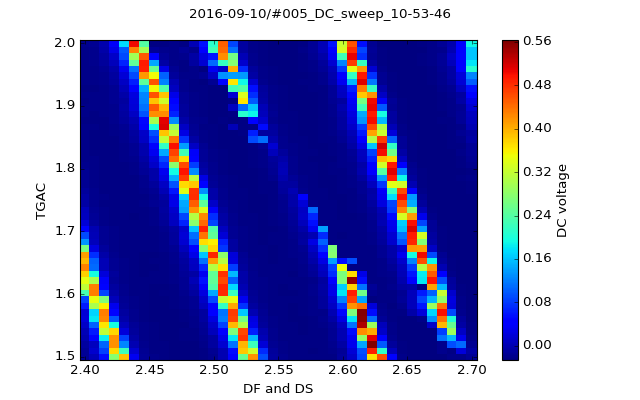

In [3]:
data = qc.load_data('2016-09-10/#005_DC_sweep_10-53-46')
plotQ = qc.MatPlot(data.DC_voltage)

ELRLR measurements showed no good spot. I decided to do another DC sweep around the donor+coulomb peak

<IPython.core.display.Javascript object>


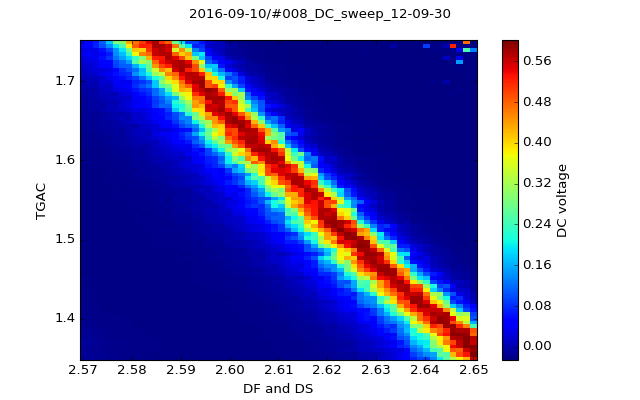

In [8]:
data = qc.load_data('2016-09-10/#008_DC_sweep_12-09-30')
plotQ = qc.MatPlot(data.DC_voltage)

It seems that the donor has shifted. 
This probably means that the system was not properly equilibrated after the magnetic field change.
Another DC sweep is done a bit more to the upper left

<IPython.core.display.Javascript object>


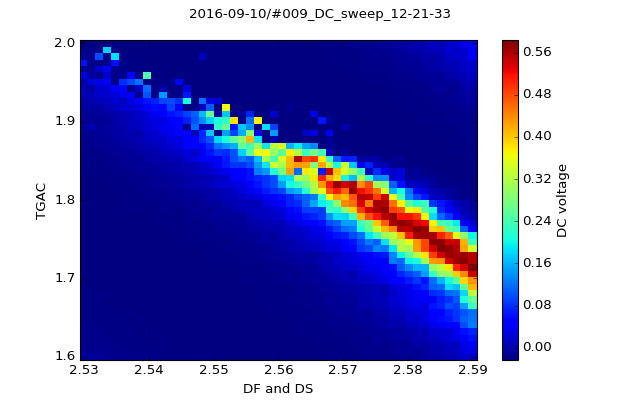

In [9]:
data = qc.load_data('2016-09-10/#009_DC_sweep_12-21-33')
plotQ = qc.MatPlot(data.DC_voltage)

One more scan of nearly the same region, after a few minutes

<IPython.core.display.Javascript object>


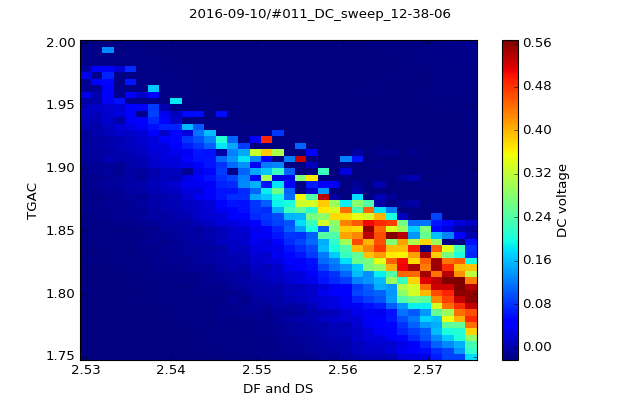

In [10]:
data = qc.load_data('2016-09-10/#011_DC_sweep_12-38-06')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


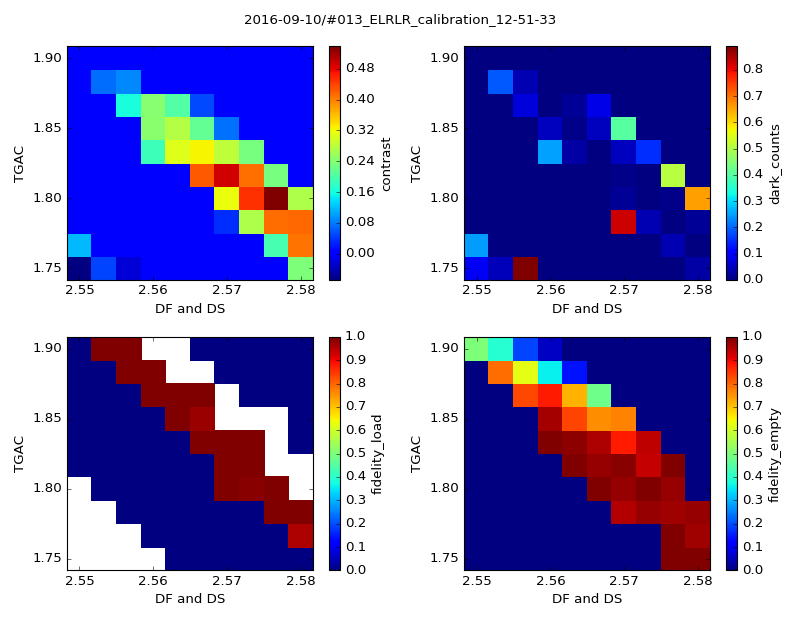

In [11]:
data = qc.load_data('2016-09-10/#013_ELRLR_calibration_12-51-33')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


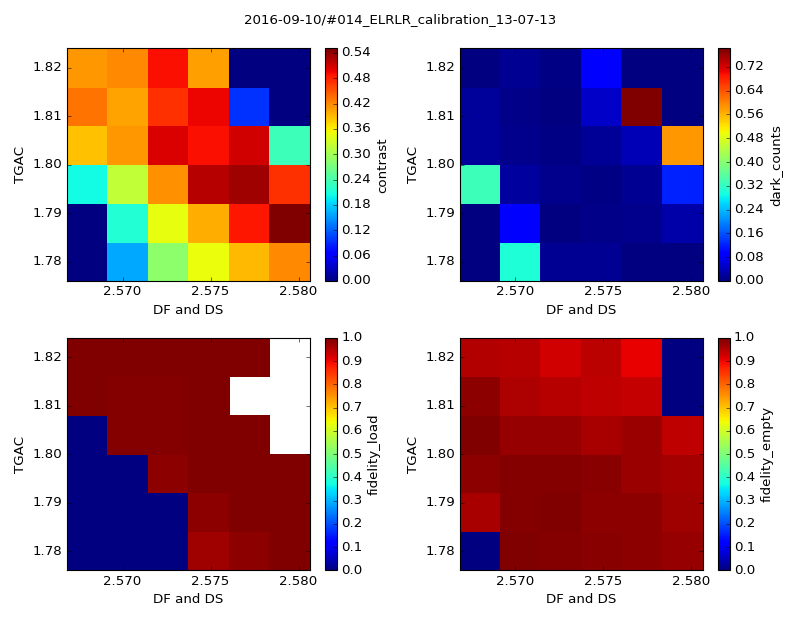

In [12]:
data = qc.load_data('2016-09-10/#014_ELRLR_calibration_13-07-13')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Final location:

TGAC(1.795)
DF_DS(2.577)

ELRLR results:

fidelity_empty: 0.993
fidelity_load: 1.000
fidelity_read: 0.863
up_proportion: 0.561
dark_counts: 0.005
contrast: 0.556

<IPython.core.display.Javascript object>


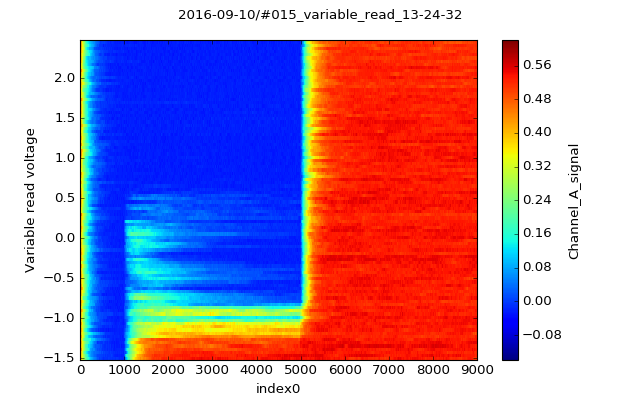

In [13]:
data = qc.load_data('2016-09-10/#015_variable_read_13-24-32')
plot = qc.MatPlot(data.Channel_A_signal)

In [ ]:
[~np.isnan(np.sum(datarow)) for datarow in data.up_proportion_3_0_0]

In [16]:
np.argmin()

0

Number of successful sweeps: 30


<IPython.core.display.Javascript object>


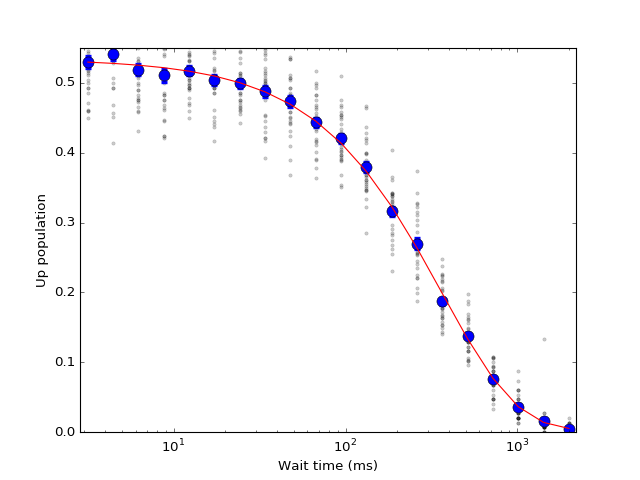

T1 time: 366 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 20
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -198.064
    Bayesian info crit = -195.076
[[Variables]]
    amplitude:   0.53156134 +/- 0.004656 (0.88%) (init= 0.541906)
    tau:         365.821116 +/- 9.251115 (2.53%) (init= 361.2882)
    offset:      0.00281003 +/- 0.004523 (160.99%) (init= 0.004226692)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.864 
    C(tau, offset)               = -0.745 
    C(amplitude, tau)            =  0.470 



In [17]:
data = qc.load_data('2016-09-10/#017_T1_data_13-39-35')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.sum([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion_3_0_0])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion_3_0_0[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted,vals_mean_sorted)#, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
plt.plot(T1_wait_times_sorted, result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.55])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')
print(result.fit_report())

# Measurement set 1

## DC measurements

<IPython.core.display.Javascript object>


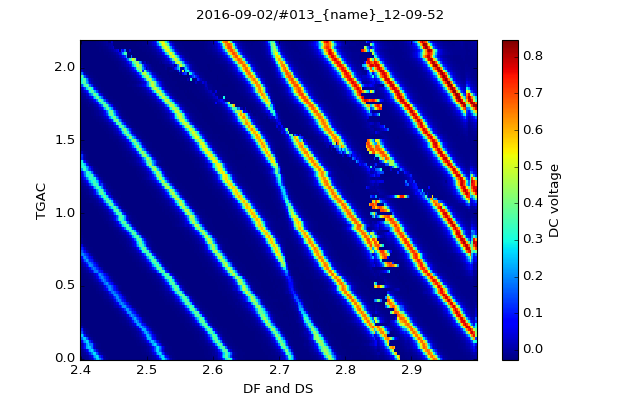

In [18]:
data = qc.load_data('2016-09-02/#013_{name}_12-09-52')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

In [19]:
# Determining the coulomb peak trace
low = np.array([2.7607, 0.5018])
high = np.array([2.54653, 1.78387])
difference = high - low
ratio = difference / np.linalg.norm(difference)
print(ratio)

[-0.16476701  0.98633252]


The peaks seem to have shifted right after the measurements. Here is the updated version for a small region

<IPython.core.display.Javascript object>


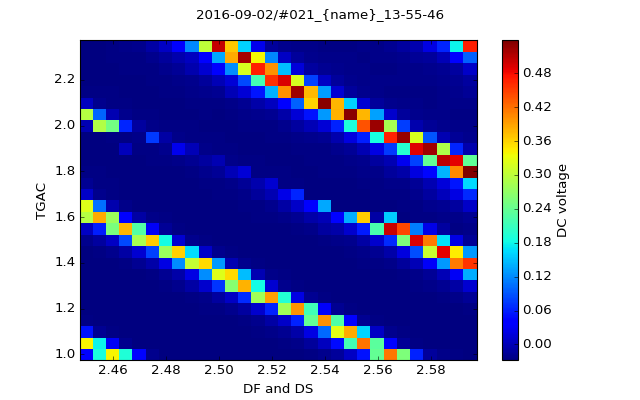

In [21]:
data = qc.load_data('2016-09-02/#021_{name}_13-55-46')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

Below a zoom-in region is shown for the donor shift

<IPython.core.display.Javascript object>


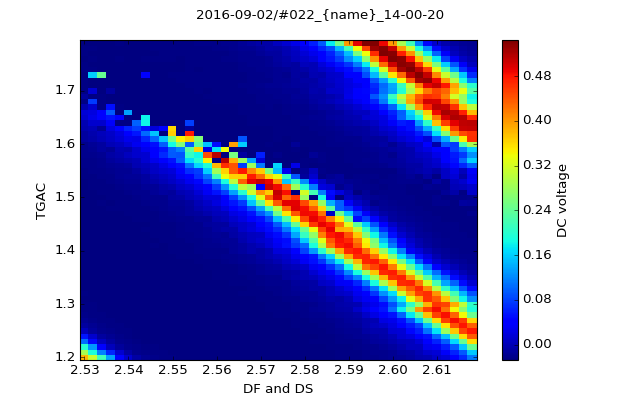

In [23]:
data = qc.load_data('2016-09-02/#022_{name}_14-00-20')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

<IPython.core.display.Javascript object>


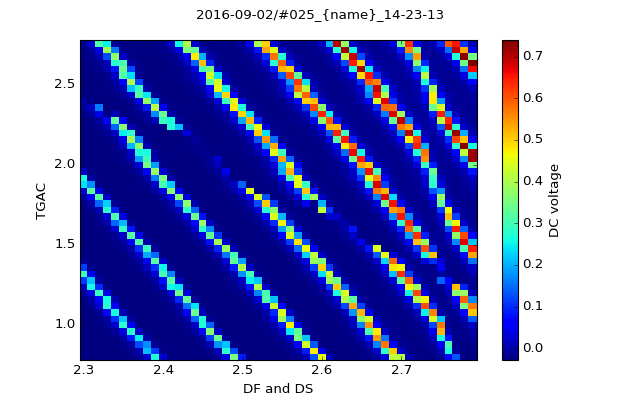

(0.8, 2.8)

In [25]:
data = qc.load_data('2016-09-02/#025_{name}_14-23-13')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)
plotQ.subplots[0].set_xlim(2.3,2.8)
plotQ.subplots[0].set_ylim(0.8,2.8)

## Tuning

<IPython.core.display.Javascript object>


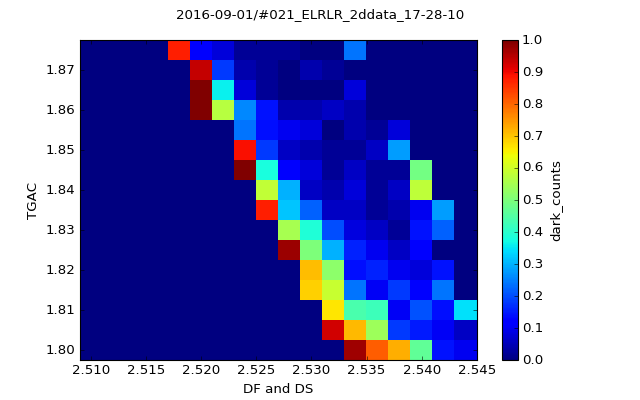

In [27]:
data = qc.load_data('2016-09-01/#021_ELRLR_2ddata_17-28-10')

plotQ = qc.MatPlot()
plotQ.add(data.dark_counts)

# Variable read

<IPython.core.display.Javascript object>


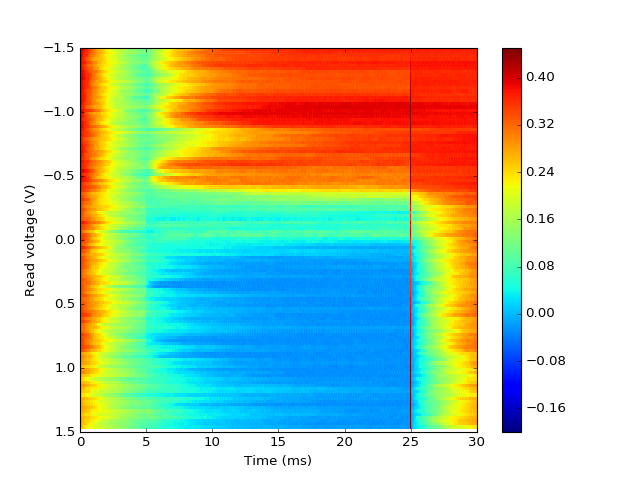

In [31]:
data = qc.load_data('2016-09-02/#030_variable_read_15-58-04')

fig = plt.figure()
plt.pcolormesh(data.index0[0]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal)
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.45])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

<IPython.core.display.Javascript object>


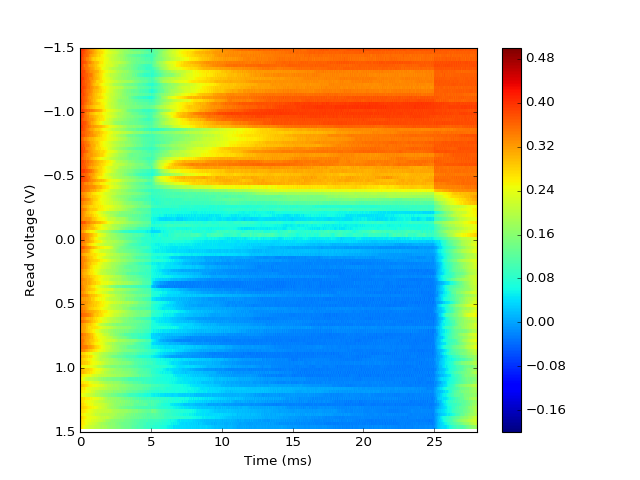

In [32]:
# data = qc.load_data('data/2016-09-02/#029_variable_read_15-29-43')

fig = plt.figure()
plt.pcolormesh(data.index0[0]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal,
               cmap=plt.get_cmap('jet'))
plt.xlim([0,28])
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.5])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

# T1 measurement

Number of successful sweeps: 140


<IPython.core.display.Javascript object>


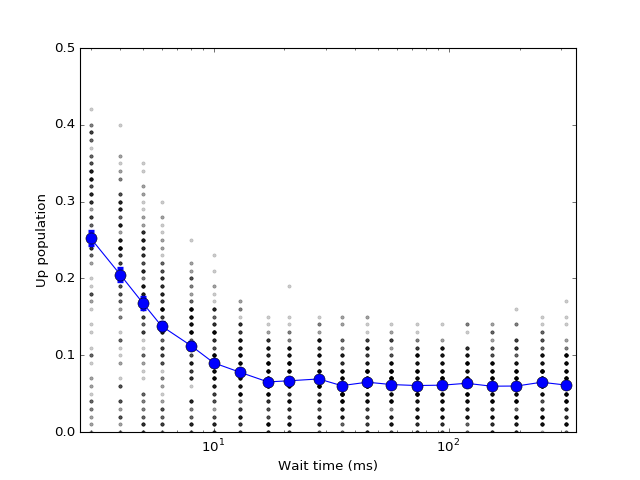

In [34]:
data = qc.load_data('2016-09-02/#001_T1_data_00-42-22')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_sorted/np.sqrt(max_idx), marker='o', ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.5])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')